In [1]:
import os
print(os.getcwd())

c:\Users\phili\Desktop\Insurance_Project\notebooks


In [2]:
from pathlib import Path
import sys
import os
# Path to project root
PROJECT_ROOT = Path.home()/ "Desktop" / "Insurance_Project"

# Add root to Python path
sys.path.append(str(PROJECT_ROOT))

# Change current directory

os.chdir(PROJECT_ROOT)



In [3]:
from pathlib import Path
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from src.models import regression as re
%matplotlib inline
import os

In [4]:
print(os.getcwd())

C:\Users\phili\Desktop\Insurance_Project


In [5]:
data_folder = Path.cwd()/"data"/"processed"
X_train = pd.read_csv(data_folder/"X_train.csv")
X_val = pd.read_csv(data_folder/"X_val.csv")
X_test = pd.read_csv(data_folder/"X_test.csv")
y_train = pd.read_csv(data_folder/"y_train.csv")
y_val = pd.read_csv(data_folder/"y_val.csv")
y_test = pd.read_csv(data_folder/"y_test.csv")


In [6]:
import importlib


importlib.reload(re)


<module 'src.models.regression' from 'C:\\Users\\phili\\Desktop\\Insurance_Project\\src\\models\\regression.py'>

In [7]:
y_train

,total_claim_amount
0,10790
1,57330
2,59670
3,91260
4,60480
...,...
695,79800
696,85300
697,58850
698,73400


In [8]:
y_plot = y_train.reset_index(drop=True).squeeze()


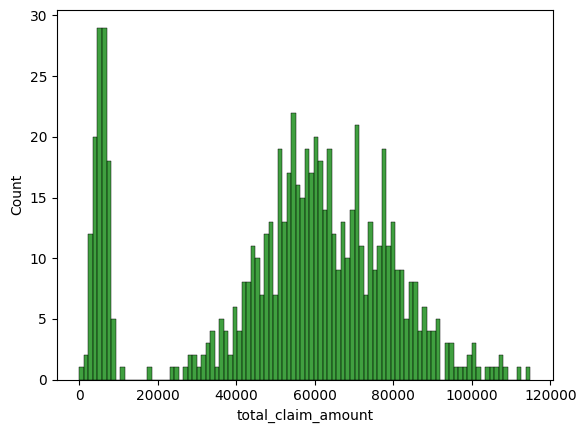

In [9]:
re.find_dist_h(y_plot)

In [ ]:
#tweed_model = re.tweed(X_train, y_train.squeeze())

TypeError: tweed() missing 1 required positional argument: 'params'

In [ ]:
importlib.reload(re)
metrics_train, y_pred_train = re.apply_tweed(X_train, y_train, tweed=tweed_model)
metrics_val, y_pred_val = re.apply_tweed(X_val, y_val, tweed_model)
#msa_train, y_pred_test = re.apply_tweeed(X_test, y_test, tweed_model)


In [ ]:
print(f"Train MSA {metrics_train[0]}")
print(f"Train MSPA {metrics_train[1]*100}%")
print(f"Train MSE {metrics_train[2]}")
print(f"Train RMSE {metrics_train[3]}")

In [ ]:
print(f"Val MSA {metrics_val[0]}")
print(f"Val MSPA {metrics_val[1]}")
print(f"Val MSE {metrics_val[2]}")
print(f"Val RMSE {metrics_val[3]}")

In [ ]:
importlib.reload(re)
best = re.optimize(X_train, y_train, X_val=X_val, y_val=y_val)

In [ ]:
print(f"Best MAE: {best["MAE"]}")
print(f"Best power: {best["params"]["power"]} --||-- Best alpha: {best["params"]["alpha"]}")

In [ ]:
params = best["params"]

In [11]:
X_train = pd.read_csv(data_folder/"reg"/"X_train.csv")
X_test = pd.read_csv(data_folder/"reg"/"X_test.csv")
y_train = pd.read_csv(data_folder/"reg"/"y_train.csv")
y_test = pd.read_csv(data_folder/"reg"/"y_test.csv")

In [12]:
importlib.reload(re)
best_model, best_params, best_mae = re.CV_optimize(X_train, y_train)

c:\Users\phili\Environments\ds_env\Lib\site-packages\sklearn\linear_model\_glm\glm.py:286: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result(
c:\Users\phili\Environments\ds_env\Lib\site-packages\sklearn\linear_model\_glm\glm.py:286: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result(
c:\Users\phili\Environments\ds_env\Lib\site-packages\sklearn\linear_model\_glm\glm.py:286: Conve

In [13]:
print(f"BEST MAE after CV: {best_mae}")
print(f"Best_params: {best_params}")

BEST MAE after CV: 5381.487209121132
Best_params: {'cv': None, 'error_score': nan, 'estimator__alpha': 1.0, 'estimator__fit_intercept': True, 'estimator__link': 'log', 'estimator__max_iter': 10000, 'estimator__power': 0.0, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': TweedieRegressor(link='log', max_iter=10000), 'n_jobs': None, 'param_grid': {'power': [np.float64(1.0), np.float64(1.1), np.float64(1.2000000000000002), np.float64(1.3000000000000003), np.float64(1.4000000000000004), np.float64(1.5000000000000004), np.float64(1.6000000000000005), np.float64(1.7000000000000006), np.float64(1.8000000000000007), np.float64(1.9000000000000008)], 'alpha': [np.float64(0.0), np.float64(0.1), np.float64(0.2), np.float64(0.30000000000000004), np.float64(0.4), np.float64(0.5), np.float64(0.6000000000000001), np.float64(0.7000000000000001), np.float64(0.8), np.float64(0.9)]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'r

In [14]:
import joblib

joblib.dump(best_model, PROJECT_ROOT/"models"/"regression"/"tweedie_model.pkl")

['C:\\Users\\phili\\Desktop\\Insurance_Project\\models\\regression\\tweedie_model.pkl']

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
y_pred_test = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

metrics = {
    'mse':mse,
    'rmse':rmse,
    'mae':mae,
    'r2':r2
}

for key, item in metrics.items():
    print(f"{key.upper()} -- {item}")


MSE -- 71711881.45190592
RMSE -- 8468.28680737172
MAE -- 5320.875500996768
R2 -- 0.892416566377716


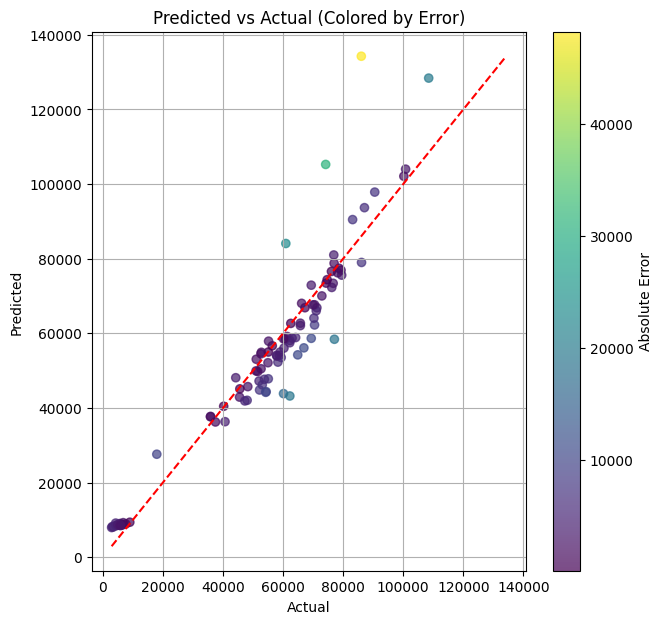

In [16]:
#Prepping the target vectors for plotting
y_pred = y_pred_test
y_test = y_test.values.ravel()
# Computing a vector of the absolute errors
errors = np.abs(y_test - y_pred)

#Plotting the figure
plt.figure(figsize=(7, 7))
# Implementing scatter of y_test and y_pred, which is color coordinated depending on error
plt.scatter(y_test, y_pred, c=errors, cmap="viridis", alpha=0.7)
plt.colorbar(label="Absolute Error")

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual (Colored by Error)")
plt.grid(True)
plt.show()


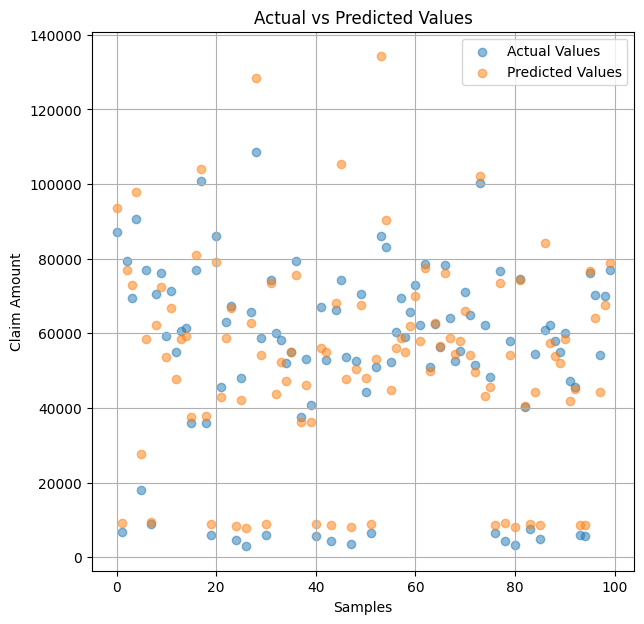

In [17]:
plt.figure(figsize=(7, 7))

plt.scatter(range(len(y_test)), y_test, alpha=0.5, label="Actual Values")
plt.scatter(range(len(y_pred)), y_pred, alpha=0.5, label="Predicted Values")

plt.xlabel("Samples")
plt.ylabel("Claim Amount")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()